# Лаборторная работа №2. Введение в pytorch.

#### Ласточкин Иван 10 вариант.

## Установка pytorch

In [1]:
import torch
import numpy as np

In [2]:
# numpy 

x = np.arange(16).reshape(4, 4)

print(f'X :\n {x}')
print(f'add 5 :\n {x + 5}')
print(f'X*X^T  :\n {np.dot(x, x.T)}')
print(f'mean over cols :\n {x.mean(axis=-1)}')
print(f'cumsum of cols :\n {np.cumsum(x, axis=0)}' )

X :
 [[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]
add 5 :
 [[ 5  6  7  8]
 [ 9 10 11 12]
 [13 14 15 16]
 [17 18 19 20]]
X*X^T  :
 [[ 14  38  62  86]
 [ 38 126 214 302]
 [ 62 214 366 518]
 [ 86 302 518 734]]
mean over cols :
 [ 1.5  5.5  9.5 13.5]
cumsum of cols :
 [[ 0  1  2  3]
 [ 4  6  8 10]
 [12 15 18 21]
 [24 28 32 36]]


In [3]:
# pytorch 

x = np.arange(16).reshape(4, 4)

x = torch.from_numpy(x).type(torch.FloatTensor) #or torch.arange(0,16).view(4,4)

print(f'X :\n {x}')
print(f'add 5 :\n {x + 5}')
print(f'X*X^T  :\n {torch.matmul(x, x.transpose(1, 0))}')
print(f'mean over cols :\n {torch.mean(x, dim=-1)}')
print(f'cumsum of cols :\n {torch.cumsum(x, dim=0)}')

X :
 tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.],
        [12., 13., 14., 15.]])
add 5 :
 tensor([[ 5.,  6.,  7.,  8.],
        [ 9., 10., 11., 12.],
        [13., 14., 15., 16.],
        [17., 18., 19., 20.]])
X*X^T  :
 tensor([[ 14.,  38.,  62.,  86.],
        [ 38., 126., 214., 302.],
        [ 62., 214., 366., 518.],
        [ 86., 302., 518., 734.]])
mean over cols :
 tensor([ 1.5000,  5.5000,  9.5000, 13.5000])
cumsum of cols :
 tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  6.,  8., 10.],
        [12., 15., 18., 21.],
        [24., 28., 32., 36.]])


## NumPy vs Pytorch

In [4]:
import torch
import numpy as np

x = torch.linspace(0, 2 * np.pi, 16, dtype=torch.float64)

# Вычисляем sin(x) и cos(x)
sin_x = torch.sin(x)
cos_x = torch.cos(x)

# Вычисляем sin^2(x) и cos^2(x)
sin_sq = sin_x ** 2
cos_sq = cos_x ** 2

# Суммируем sin^2(x) и cos^2(x)
out = sin_sq + cos_sq

print(out.numpy())


[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


## Leaf vs Non-leaf Variable:

In [5]:
x = torch.tensor([1., 2., 3., 4.], requires_grad=True)  # leaf tensor
y = x + 1  # not a leaf variable

In [6]:
x = torch.tensor([1.], requires_grad=True)
y = x**2
print(x.requires_grad)
print(y.requires_grad)

with torch.no_grad():
    z = torch.exp(x)
    print(z.requires_grad)
    
# Отделить от графика
w = torch.log(x).detach()
print(w.requires_grad)

True
True
False
False


## Пример линейной регрессии на датасете California

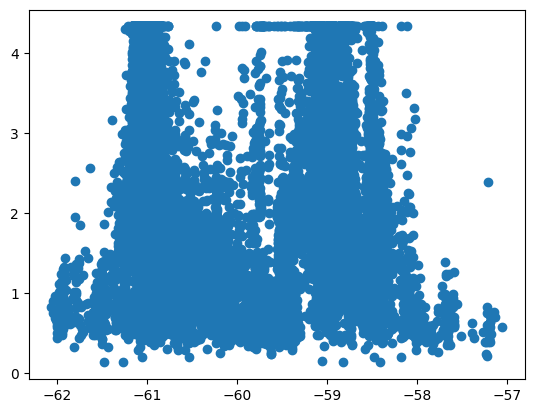

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_california_housing
X, y = fetch_california_housing(return_X_y=True)

#select one column for simplicity. 
x = X[:, -1] / X[:, -1].std()
y = y / y.std()

plt.scatter(x, y);

In [8]:
# model tensors
w = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)

# data tensors
x = torch.from_numpy(x).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

# все тензоры являются leaf-tensors
# x и y не требуют вычисления градиентов
for vv in [w, b, x, y]:
    print(vv.is_leaf, vv.requires_grad)

True True
True True
True False
True False


In [9]:
#try out gradients
y_pred = w * x + b
loss = torch.mean((y_pred - y)**2)

loss.backward()

#now w.grad is a tensor containing gradient of L w.r.t. w

print("dL/dw = \n", w.grad)
print("dL/db = \n", b.grad)

# no gradients for tensors with requires_grad=False
# and non-leaf tensors
print("Non-Leaf x dL/dx = \n", x.grad)
print("Non-Leaf loss dL/dpred = \n", y_pred.grad)

dL/dw = 
 tensor([214.0627])
dL/db = 
 tensor([-3.5852])
Non-Leaf x dL/dx = 
 None
Non-Leaf loss dL/dpred = 
 None


/var/folders/gd/q1kn3q7x3tx28rn565y28k080000gn/T/ipykernel_17166/3846789532.py:15: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/build/aten/src/ATen/core/TensorBody.h:494.)
  print("Non-Leaf loss dL/dpred = \n", y_pred.grad)


## Градиенты промежуточных вершин

In [10]:
y_pred = w * x + b

# check this:
y_pred.retain_grad()

loss = torch.mean((y_pred - y)**2)
loss.backward()

print("Non-Leaf loss dL/dpred = \n", y_pred.grad[:10])

Non-Leaf loss dL/dpred = 
 tensor([-0.0004, -0.0003, -0.0003, -0.0003, -0.0003, -0.0002, -0.0003, -0.0002,
        -0.0002, -0.0002])


## Линейная регрессия

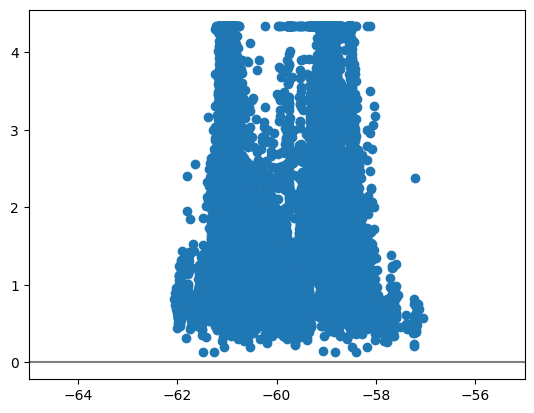

loss =  nan


In [11]:
from IPython.display import clear_output

for i in range(100):
    
    #compute loss
    y_pred = w * x  + b
    loss = torch.mean((y_pred - y)**2)
    
    # backprop
    loss.backward()
    
    # gradient descent step for weights
    # take alpha about 0.1
    alpha = 0.1
    with torch.no_grad():
        w -= alpha * w.grad
        b -= alpha * b.grad
    
    #zero gradients
    w.grad.zero_()
    b.grad.zero_()
    
    #the rest of code is just bells and whistles
    if (i + 1) % 5==0:
        #draw linear regression prediction vs data
        clear_output(True)
        plt.axhline(0, color='gray')
        plt.axvline(0, color='gray')
        plt.scatter(x.numpy(), y.numpy())
        plt.plot(x.numpy(),y_pred.data.numpy(),color='orange')
        plt.xlim(-65, -55) 
        plt.show()

        print("loss = ", loss.item())
        if loss.item() < 0.5:
            print("Done!")
            break


## Оптимизаторы

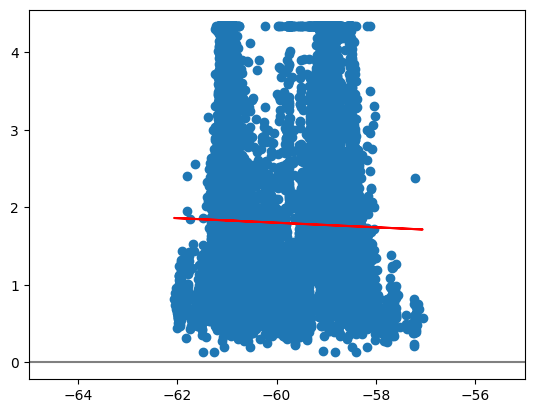

loss =  0.9981564283370972


In [12]:
# load_boston почему то недоступен(
x, y = fetch_california_housing(return_X_y=True)
x = x[:, -1] / x[:, -1].std()
y = y / y.std()

# data tensors
x = torch.from_numpy(x).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

# model tensors
w = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)

# define optimizer
opt = torch.optim.RMSprop([w, b], lr=0.1)

for i in range(100):
    y_pred = w * x + b
    loss = torch.mean((y_pred - y) ** 2) #######
    
    # backprop and gradient descent
    loss.backward()
    opt.step()
    opt.zero_grad()
    
    #the rest of code is just bells and whistles
    if (i + 1) % 5 == 0:
        #draw linear regression prediction vs data
        clear_output(True)
        plt.axhline(0, color='gray')
        plt.axvline(0, color='gray')
        plt.scatter(x.numpy(), y.numpy())
        plt.plot(x.numpy(), y_pred.data.numpy(), color='red')
        plt.xlim(-65, -55) 
        plt.show()

        print("loss = ", loss.item())
        if loss.item() < 0.5:
            print("Done!")
            break

## Высокоуровневые API

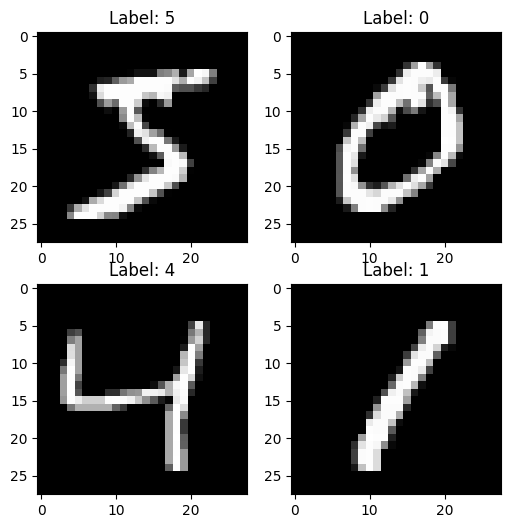

In [13]:
# MNIST 
from util import load_mnist
X_train, y_train, X_val, y_val, X_test, y_test = load_mnist(flatten=True)

plt.figure(figsize=[6, 6])
for i in range(4):
    plt.subplot(2, 2, i + 1)
    plt.title(f"Label: {y_train[i]}")
    plt.imshow(X_train[i].reshape([28, 28]), cmap='gray');

In [14]:
# Higher-level API:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self, hidden_size=40):
        super(Net, self).__init__()
        # here you construct weights for layers
        self.fc1 = nn.Linear(X_train.shape[1], hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, 10)
        
    def forward(self, x):
        # here you describe usage of layers
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        # check log_softmax signature
        return F.log_softmax(x, dim=-1)
    # backward function computes automaticaly

In [21]:
# model interface:
model = Net()
tt = torch.from_numpy(X_train[:10, :].astype(np.float32))
output = model(tt)

print('Model outputs: \n', output)
# Получаем вероятности из output с помощью экспоненциальной функции, поскольку output - это логарифм вероятностей
probs = torch.exp(output)
print('Probs: \n', probs)

# Получаем предсказания из output, выбирая индекс с наибольшим значением в каждой строке
# Это эквивалентно выбору класса с наибольшей вероятностью
pred = torch.argmax(output, dim=1)
print('Pred: \n', pred.data.numpy())
print('Truth: \n', y_train[:10])

Model outputs: 
 tensor([[-2.2426, -2.4252, -2.3413, -2.3192, -2.2663, -2.1657, -2.1972, -2.2290,
         -2.4360, -2.4515],
        [-2.2692, -2.4252, -2.3401, -2.3430, -2.2644, -2.1443, -2.2077, -2.2038,
         -2.4616, -2.4181],
        [-2.2693, -2.4464, -2.3166, -2.3315, -2.2778, -2.1203, -2.1933, -2.2127,
         -2.4792, -2.4419],
        [-2.2725, -2.4338, -2.3064, -2.3242, -2.2652, -2.1462, -2.2656, -2.1954,
         -2.4538, -2.4082],
        [-2.2861, -2.4493, -2.3035, -2.3428, -2.2662, -2.1315, -2.2396, -2.1975,
         -2.4448, -2.4157],
        [-2.2447, -2.4728, -2.3178, -2.3179, -2.2955, -2.1701, -2.2306, -2.1773,
         -2.4536, -2.3963],
        [-2.2980, -2.4521, -2.3062, -2.3250, -2.2691, -2.1394, -2.2244, -2.1935,
         -2.4558, -2.4142],
        [-2.2758, -2.4550, -2.3044, -2.3378, -2.2489, -2.1367, -2.1937, -2.2239,
         -2.4762, -2.4332],
        [-2.2711, -2.4404, -2.3254, -2.3152, -2.2697, -2.1435, -2.2402, -2.1970,
         -2.4487, -2.4235],
  

### Тренировка сети

In [22]:
from IPython.display import clear_output
from tqdm.auto import tqdm

# функция для итераций по минибатчам
def iterate_minibatches(inputs, targets, batchsize, shuffle=False):
    assert len(inputs) == len(targets)
    if shuffle:
        indices = np.random.permutation(len(inputs))
    for start_idx in tqdm(range(0, len(inputs) - batchsize + 1, batchsize)):
        if shuffle:
            excerpt = indices[start_idx:start_idx + batchsize]
        else:
            excerpt = slice(start_idx, start_idx + batchsize)
        yield inputs[excerpt], targets[excerpt]

In [26]:
def train(model, optimizer, batchsize=32):
    loss_log = []
    model.train()
    for x_batch, y_batch in iterate_minibatches(X_train, y_train, batchsize=batchsize, shuffle=True):
        # data preparation
        data = torch.from_numpy(x_batch.astype(np.float32))
        target = torch.from_numpy(y_batch.astype(np.int64))

        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)
        # compute gradients
        loss.backward()
        # make a step
        optimizer.step()
        loss = loss.item()
        loss_log.append(loss)
    return loss_log


# TODO: написать функцию для валидации по X_val, y_val
# hint: optimizer не нужен
def test(model):
    loss_log = []
    model.eval()# переключаем модель в режим предсказания
    with torch.no_grad():  # отключаем вычисление градиентов
        for x_batch, y_batch in iterate_minibatches(X_val, y_val, batchsize=32, shuffle=False):
            data = torch.from_numpy(x_batch.astype(np.float32))
            target = torch.from_numpy(y_batch.astype(np.int64))
            output = model(data)
            loss = F.nll_loss(output, target)  # вычисляем потерю
            loss_log.append(loss.item())  # сохраняем значение потери
    return np.mean(loss_log)  # возвращаем среднее значение потери на валидационном наборе

In [31]:
def plot_history(train_history, val_history, title='loss'):
    plt.figure()
    plt.plot(train_history, label='train')
    plt.plot(np.linspace(0, len(train_history), len(val_history)), val_history, label='val', color='red')
    plt.title(title)
    plt.xlabel('Training steps')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

Epoch 10
Train loss: 0.05757099006226404
Val loss: 0.11608472711670914


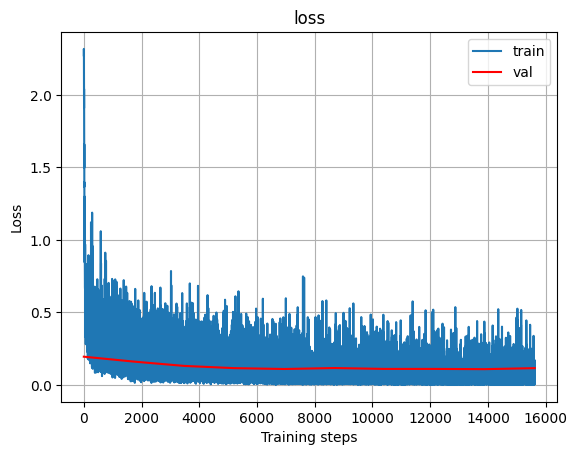

In [32]:
train_log = []
val_log = []

model = Net()
opt = torch.optim.RMSprop(model.parameters(), lr=0.001)
batchsize = 32

for epoch in range(10):
    train_loss = train(model, opt, batchsize=batchsize)
    train_log.extend(train_loss)
    
    val_loss = np.mean(test(model))
    val_log.append(val_loss)  # сохраняем среднее значение потери на валидации
    
    clear_output(wait=True)
    print(f"Epoch {epoch+1}")
    print(f"Train loss: {np.mean(train_loss)}")
    print(f"Val loss: {val_loss}")
    plot_history(train_log, val_log)  # визуализируем историю обучения

## Метрики

Epoch 10
Train loss: 0.058727663661859796, Train accuracy: 0.9818341869398207
Val loss: [0.07662007212638855, 0.007915190421044827, 0.3579351007938385, 0.023121302947402, 0.00842077936977148, 0.016402028501033783, 0.27602073550224304, 0.21141351759433746, 0.005303398706018925, 0.060615260154008865, 0.24180485308170319, 0.1019592359662056, 0.2438991516828537, 0.3756983280181885, 0.06776774674654007, 0.056872740387916565, 0.4630421996116638, 0.24292045831680298, 0.032983314245939255, 0.09595136344432831, 0.053684722632169724, 0.0324779748916626, 0.1997300237417221, 0.11521726846694946, 0.014388803392648697, 0.1761625111103058, 0.12154743075370789, 0.020975971594452858, 0.18925265967845917, 0.04311301186680794, 0.004075553733855486, 0.18827013671398163, 0.0896499902009964, 0.06419423967599869, 0.0742594376206398, 0.010494857095181942, 0.02946595288813114, 0.010222877375781536, 0.14736023545265198, 0.29288968443870544, 0.17798952758312225, 0.019815638661384583, 0.10031738877296448, 0.01558

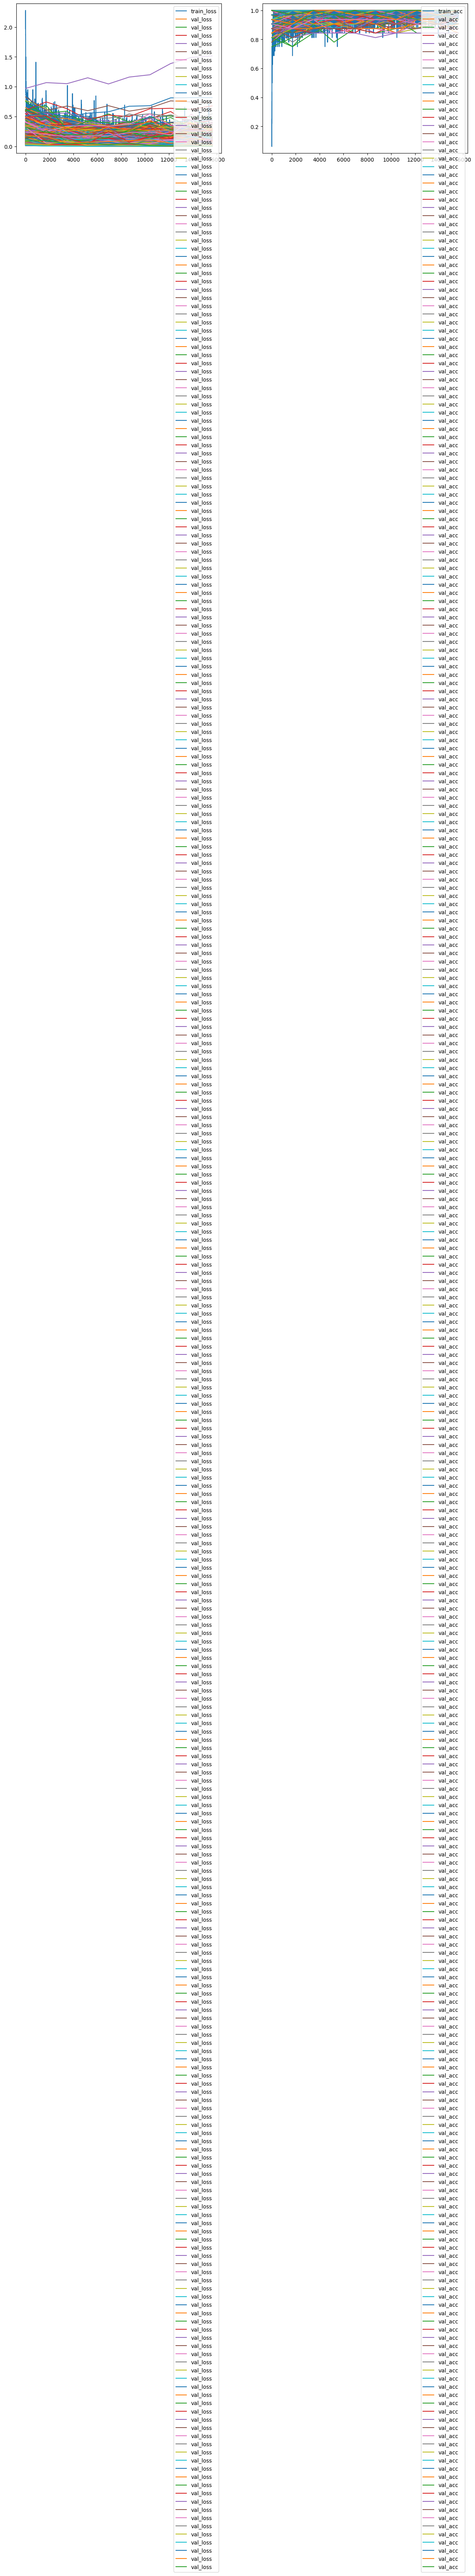

In [34]:
def train(model, optimizer, batchsize=32):
    loss_log, acc_log = [], []
    
    model.train()
    for x_batch, y_batch in iterate_minibatches(X_train, y_train, batchsize=batchsize, shuffle=True):
        data = torch.from_numpy(x_batch.astype(np.float32))
        target = torch.from_numpy(y_batch.astype(np.int64))
        
        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        
        preds = torch.argmax(output, dim=1)
        accuracy = torch.mean((preds == target).float())
        
        loss_log.append(loss.item())
        acc_log.append(accuracy.item())
    
    return loss_log, acc_log


def test(model):
    loss_log, acc_log = [], []
    
    model.eval()
    with torch.no_grad():
        for x_batch, y_batch in iterate_minibatches(X_val, y_val, batchsize=32, shuffle=False):
            data = torch.from_numpy(x_batch.astype(np.float32))
            target = torch.from_numpy(y_batch.astype(np.int64))
            
            output = model(data)
            loss = F.nll_loss(output, target)
            
            preds = torch.argmax(output, dim=1)
            accuracy = torch.mean((preds == target).float())
            
            loss_log.append(loss.item())
            acc_log.append(accuracy.item())
    
    return loss_log, acc_log



def plot_history(loss_log, acc_log, val_loss_log, val_acc_log):
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 2, 1)
    plt.plot(loss_log, label='train_loss')
    plt.plot(np.linspace(0, len(loss_log), len(val_loss_log)), val_loss_log, label='val_loss')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(acc_log, label='train_acc')
    plt.plot(np.linspace(0, len(acc_log), len(val_acc_log)), val_acc_log, label='val_acc')
    plt.legend()
    
    plt.show()


train_log, train_acc_log = [], []
val_log, val_acc_log = [], []

model = Net()
opt = torch.optim.RMSprop(model.parameters(), lr=0.001)
batchsize = 32


for epoch in range(10):
    train_loss, train_acc = train(model, opt, batchsize=batchsize)
    val_loss, val_acc = test(model)
    
    train_log.extend(train_loss)
    train_acc_log.extend(train_acc)
    val_log.append(val_loss)
    val_acc_log.append(val_acc)
    
    clear_output(wait=True)
    print(f"Epoch {epoch+1}")
    print(f"Train loss: {np.mean(train_loss)}, Train accuracy: {np.mean(train_acc)}")
    print(f"Val loss: {val_loss}, Val accuracy: {val_acc}")
    plot_history(train_log, train_acc_log, val_log, val_acc_log)
    

### Пример использования загрузчика данных:

In [ ]:
%matplotlib inline

import time
import os

import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision

from torchvision import datasets, models, transforms
from torch.optim import lr_scheduler


data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

data_dir = 'hymenoptera_data'
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x])
                  for x in ['train', 'val']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4,
                                             shuffle=True, num_workers=4)
              for x in ['train', 'val']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
class_names = image_datasets['train'].classes

use_gpu = torch.cuda.is_available()
plt.ion()

In [ ]:
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.1)  # pause a bit so that plots are updated


# Get a batch of training data
inputs, classes = next(iter(dataloaders['train']))

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)

imshow(out, title=[class_names[x] for x in classes])

In [ ]:
# обратите внимание на сохранение лучшей версии весов сети
def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()

    best_model_wts = model.state_dict()
    best_acc = 0.0

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                scheduler.step()
                model.train(True)  # Set model to training mode
            else:
                model.train(False)  # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for data in dataloaders[phase]:
                # get the inputs
                inputs, labels = data

                if use_gpu:
                    inputs = inputs.cuda()
                    labels = labels.cuda()

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                outputs = model(inputs)
                _, preds = torch.max(outputs, 1)
                loss = criterion(outputs, labels)

                # backward + optimize only if in training phase
                if phase == 'train':
                    loss.backward()
                    optimizer.step()

                # statistics
                running_loss += loss.item()
                running_corrects += torch.sum(preds == labels).type(torch.float)

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects / dataset_sizes[phase]

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_acc))

            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = model.state_dict()
        
        time_elapsed = time.time() - since
        print('Elapsed {:.0f}m {:.0f}s\n'.format(time_elapsed // 60, time_elapsed % 60))

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model

In [ ]:
# torchvision содержит ряд моделей с претрейненными весами:
[m for m in dir(models) if not m.startswith('_')]

In [ ]:
import torch.nn as nn
import torch.optim as optim
from torchvision import models

# Load pre-trained ResNet18 model
model_ft = models.resnet18(pretrained=True)

# Replace the last fully connected layer with a new one for two classes
num_ftrs = model_ft.fc.in_features
model_ft.fc = nn.Linear(num_ftrs, 2)

# Choose which parameters to train
# For fine-tuning the entire model or just the last layer, uncomment the appropriate line below
# params_to_train = model_ft.parameters()  # Fine-tune entire model
params_to_train = model_ft.fc.parameters()  # Fine-tune only the last layer

# Use GPU if available
if use_gpu:
    model_ft = model_ft.cuda()

# Loss function
criterion = nn.CrossEntropyLoss()

# Optimizer
optimizer_ft = optim.SGD(params_to_train, lr=0.001, momentum=0.9)

# Learning rate scheduler
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)


In [ ]:
model_ft = train_model(
    model_ft, criterion, optimizer_ft, exp_lr_scheduler, num_epochs=25)
# если всё сделано правильно, то точность на валидации должна быть больше 94%

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from torchvision import transforms

def visualize(model, num_images=10):
    # Set the model to evaluation mode
    model.eval()

    # Define transformations to apply to the images
    transform = transforms.Compose([
        transforms.ToPILImage(),
        transforms.Resize((224, 224)),  # Resize to the input size of the model
        transforms.ToTensor(),
    ])

    # Get a batch of images from the validation set
    val_loader = dataloaders['val']
    data_iter = iter(val_loader)
    images, labels = next(data_iter)

    # Use GPU if available
    if use_gpu:
        images = images.cuda()

    # Make predictions
    outputs = model(images)
    _, preds = torch.max(outputs, 1)

    # Convert tensors to numpy arrays
    images = images.cpu().numpy()
    preds = preds.cpu().numpy()

    # Display the images and predictions
    plt.figure(figsize=(15, 8))
    for i in range(num_images):
        image = transform(images[i])
        plt.subplot(2, 5, i+1)
        plt.imshow(np.transpose(image.numpy(), (1, 2, 0)))
        plt.title(f'Predicted: {class_names[preds[i]]}')
        plt.axis('off')
    plt.show()

# Call the visualize function
visualize(model_ft)
